In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

##### After the surprising result on the "benfordness" of the Youtube statistics, let's study in more detail the YouTube dataframe.

In [47]:
dfYT = pd.read_csv('datasets/USvideos.csv')

attr = ['views', 'likes', 
        'dislikes', 'comment_count']

dfYT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
dfYT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### First let's see if there are missing values. 

Only a large amount in the 'description' column has NaN values. I'll drop it.

In [7]:
dfYT.drop(['description'], axis=1, inplace= True)

#### There is a column named "video_id".. can I use it as index? 

In [127]:
len(dfYT.video_id.unique())   # = 6351, over a total of 40949 videos... why??

6351

Some videos appear multiple times in the dataframe. Let's check which duplicates there are and remove them.

There must have been a mistake on the 18.15.05: it is the only day with duplicates ...

In [50]:
len(dfYT[dfYT['video_id']=='j4KvrAUjn6c']) # are they views/likes/.. per DAY?  
# there are 30 rows... let's check it the days are all different: 
len(dfYT[dfYT['video_id']=='j4KvrAUjn6c']['trending_date'].unique()) #  29 unique days -.- why??

# 18.15.05 is the only day which appears two times
double_day = dfYT[(dfYT['video_id']=='j4KvrAUjn6c') & (dfYT['trending_date']=='18.15.05')].index

dfYT.loc[double_day[1]]==dfYT.loc[double_day[0]] # this row appears identically two times

duplicates = dfYT[dfYT.duplicated()==True].index

dfYT.drop(labels = duplicates, axis = 0 , inplace = True)

Now let's check if the rows with same video_id have all a different day:

In [36]:
duplic_df = dfYT[dfYT.duplicated(subset = ['video_id'], keep = False)==True]

for i in duplic_df['video_id'].unique():
    if len(duplic_df[duplic_df['video_id']==i]['trending_date'].unique())!= len(duplic_df[duplic_df['video_id']==i]):
        print(i)

YI3tsmFsrOg
vY_5EvoL1Is


There are only two videos that share the same trending_date

In [54]:
dfYT[dfYT['video_id']== 'YI3tsmFsrOg']   # the indices 34763 and 34912 are the ones
dfYT.loc[34763]==dfYT.loc[34912]         # the only difference is in the number of likes: 197843 vs 197847
# it doesn't change much!

dfYT[dfYT['video_id']== 'vY_5EvoL1Is']   # the indices 34771 and 34920 are the ones
dfYT.loc[34771]==dfYT.loc[34920]         # same here, only likes and dislikes are different, but not too far! 
 
dfYT.drop(labels = [34763, 34771], axis = 0 , inplace = True)

In [55]:
dfYT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### More about the columns of the dafarame:

In [58]:
dfYT.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [62]:
cols = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time']

for c in cols:
    print (c, ' has ', len(dfYT[c].unique()) , ' unique values')

video_id  has  6351  unique values
trending_date  has  205  unique values
title  has  6455  unique values
channel_title  has  2207  unique values
category_id  has  16  unique values
publish_time  has  6269  unique values


I'm courious about how old are the videos and the time range:

In [91]:
dfYT['publish_time'] = pd.to_datetime(dfYT['publish_time'])
for i in dfYT.index:
    dfYT['publish_time'][i] = dfYT['publish_time'][i].replace(hour=0, minute=0, second = 0)
    
dates = dfYT['publish_time'].copy()

print('Oldest video: ', min(dates))
print('Most recent video: ', max(dates))

<ipython-input-91-d6296edd8c17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfYT['publish_time'][i] = dfYT['publish_time'][i].replace(hour=0, minute=0, second = 0)


Oldest video:  2006-07-23 00:00:00
Most recent video:  2018-05-15 00:00:00


How many days later after the publication a video goes in the trends?

In [89]:
# dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'])
# it looks the dates have a strange format... convert it to timedate accordingly
dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'], format = '%y.%d.%m')
# don't consider timezone of the published time, as I don't know the one of the trending date
dfYT['publish_time'] = dfYT['publish_time'].apply(lambda x: x.replace(tzinfo=None))
# calculate the delta
diff = dfYT['trending_date']-dfYT['publish_time']

print ('Minimum time before being trendy: ', diff.min())
print ('Maximum time before being trendy: ', diff.max())
print ('Mean time: ', diff.mean())
print ('Median time: ', diff.median())

dfYT['trending_time'] = diff

Minimum time before being trendy:  0 days 00:00:00
Maximum time before being trendy:  4215 days 00:00:00
Mean time:  16 days 19:51:42.501283
Median time:  5 days 00:00:00


Mean value and mean are quite different.. the most of the videos are viral in very short time!

#### Extract the categories of the videos using JSON

In [93]:
import json

category_id_filepath = 'datasets/US_category_id.json'
category_id_json = open(category_id_filepath)

raw_category_data = json.load(category_id_json)

category_data = {}

for item in raw_category_data['items']:
    category_data[int(item['id'])] = item['snippet']['title']

# Mapping category data into the dataframe
dfYT['category'] = dfYT['category_id'].apply(lambda x: category_data.get(x, 'N/A'))

In [95]:
dfYT['category'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

### Correlations

In [101]:
dfYT.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168249,-0.173958,-0.033581,-0.076370,0.048940,-0.013494,-0.030019
views,-0.168249,1.000000,0.849181,0.472217,0.617657,0.002700,0.015358,-0.002256
likes,-0.173958,0.849181,1.000000,0.447191,0.803088,-0.028903,-0.020891,-0.002641
dislikes,-0.033581,0.472217,0.447191,1.000000,0.700194,-0.004416,-0.008231,-0.001853
comment_count,-0.076370,0.617657,0.803088,0.700194,1.000000,-0.028261,-0.013822,-0.003726
comments_disabled,0.048940,0.002700,-0.028903,-0.004416,-0.028261,1.000000,0.319486,-0.002972
ratings_disabled,-0.013494,0.015358,-0.020891,-0.008231,-0.013822,0.319486,1.000000,-0.001528
video_error_or_removed,-0.030019,-0.002256,-0.002641,-0.001853,-0.003726,-0.002972,-0.001528,1.000000


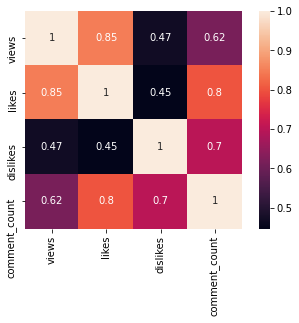

In [100]:
num_attr = ['views', 'likes', 'dislikes', 'comment_count']

sns.heatmap(dfYT[num_attr].corr(),square=True, annot=True)

I don't see relevant correlations among the numerical attributes other than the one between views/likes/comment_count

### Data visualization

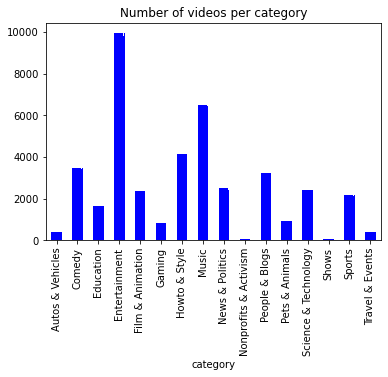

In [111]:
dfYT.groupby(['category']).count().plot(kind='bar', legend=False, title = 'Number of videos per category', color = 'blue')
plt.show()

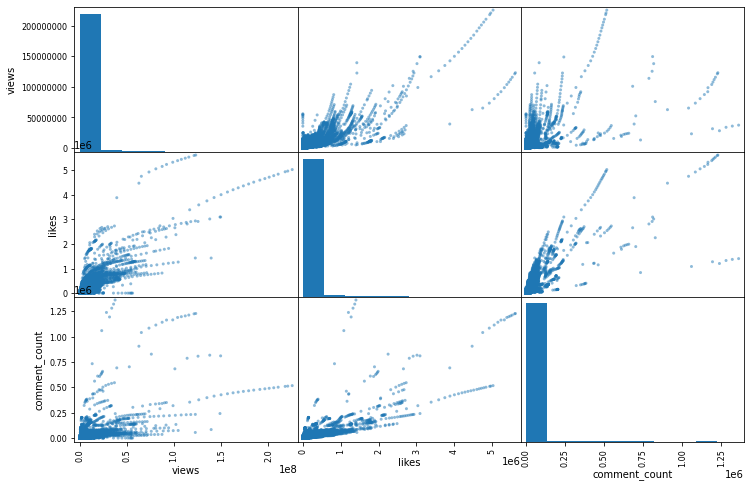

In [102]:
from pandas.plotting import scatter_matrix

attributes = ['views', 'likes', 'comment_count']
scatter_matrix(dfYT[attributes], figsize = (12,8))
plt.show()

The most common category is "Entertainment", followed by "Music". Unfortunately in last position we find "Nonprofits & Activism"...

In [109]:
for i in dfYT.category_id.unique():
    print(i)
    print(dfYT[dfYT['category_id']==i]['comment_count'].max(),'\n')

22
383762 

24
1361580 

23
81051 

28
180913 

1
108849 

25
38936 

17
83660 

10
1228655 

15
44063 

27
28835 

26
203884 

2
10591 

19
13631 

20
144795 

29
658130 

43
2181 



## Benfordness per channel:

In [118]:
dfYT.channel_title.value_counts()
# there are 2207 different channels

ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              192
Vox                                       192
                                         ... 
Whitney Port                                1
SiggasNation™                               1
BrianJustinCrum                             1
Caters Clips                                1
BillyCrammer                                1
Name: channel_title, Length: 2207, dtype: int64

In [43]:
# create a dictionary with {'channel title': mean squared error, ....}
RMSE_dict = {}

# lets' consider channels with at least 100 videos
n_videos = 100

for channel in dfYT.channel_title.unique():
    if dfYT.channel_title.value_counts()[channel]< n_videos: continue
    df_ch = dfYT[dfYT['channel_title']==channel]
    c, rmse = Benford(df_ch['views'])
    RMSE_dict[channel] = rmse
     

In [44]:
# Channel with higher error:

ch_max = max(RMSE_dict, key=RMSE_dict.get)
ch_max

'jacksfilms'

VIEWS


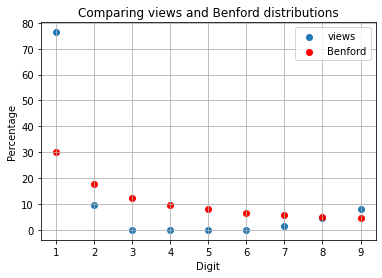

RMSE:  0.6659396650507611 


LIKES


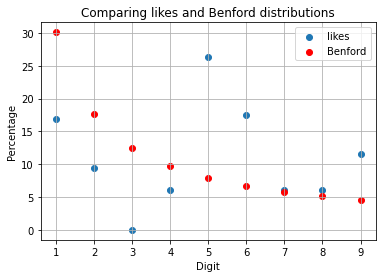

RMSE:  0.3958628176793254 


DISLIKES


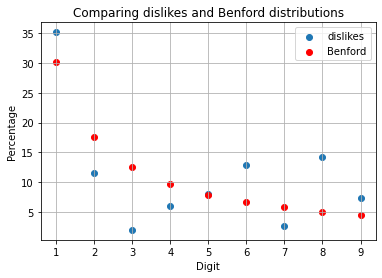

RMSE:  0.2350954196617827 


COMMENT_COUNT


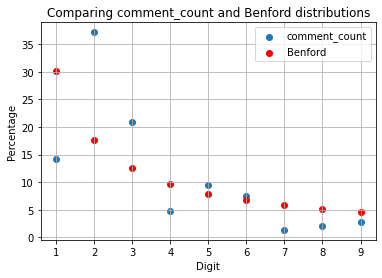

RMSE:  0.36218149099999236 




In [45]:
for col in attr:
    print(col.upper())
    Benford_print(dfYT[dfYT['channel_title']==ch_max][col],col)

In [46]:
# it looks that there are a high number of views starting with 1... maybe this is the reason

# I'll look at the second highest

# would also like to find a treshold for the RMSE to accept

In [47]:
x = sorted(((v,k) for k,v in RMSE_dict.items()))

ch_sec = x[-2][1]
ch_third = x[-3][1]

Channel name:  Dude Perfect
VIEWS


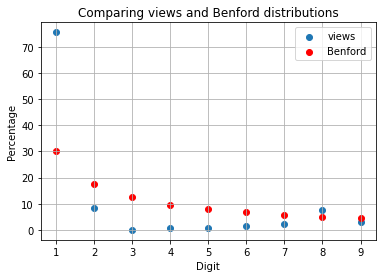

RMSE:  0.6519436312700669 


LIKES


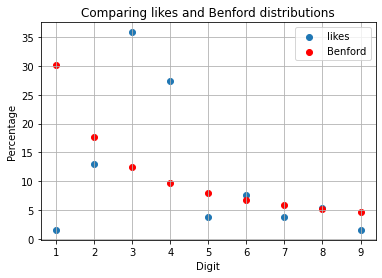

RMSE:  0.5439339214383625 


DISLIKES


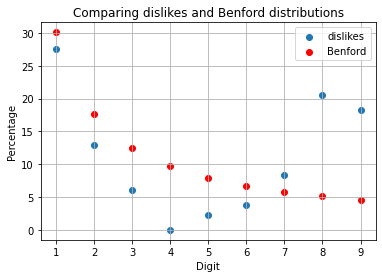

RMSE:  0.33032287697206075 


COMMENT_COUNT


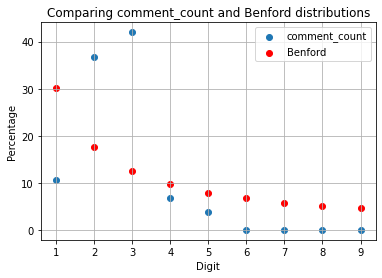

RMSE:  0.5482661242510543 




In [48]:
print('Channel name: ', ch_sec)
for col in attr:
    print(col.upper())
    Benford_print(dfYT[dfYT['channel_title']==ch_sec][col],col)

Cannel name:  Smosh
VIEWS


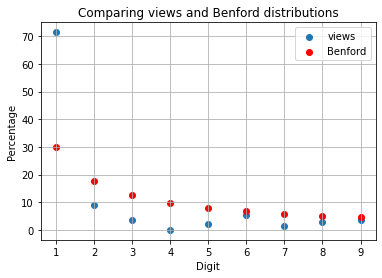

RMSE:  0.5859910080056233 


LIKES


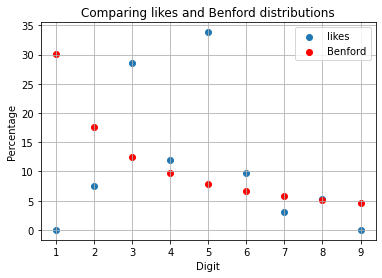

RMSE:  0.5820150755111723 


DISLIKES


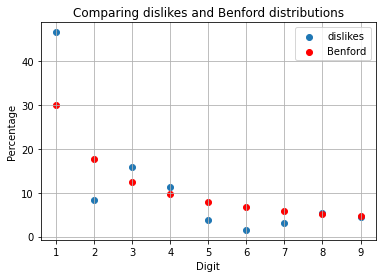

RMSE:  0.26952260575861064 


COMMENT_COUNT


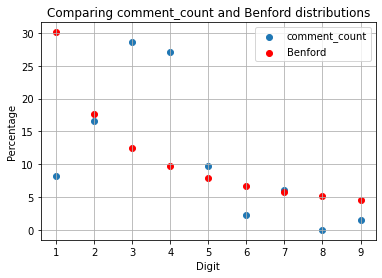

RMSE:  0.4328506344767021 




In [49]:
print('Cannel name: ', ch_third)

for col in attr:
    print(col.upper())
    Benford_print(dfYT[dfYT['channel_title']==ch_third][col],col)

### Benfordness per category

In [80]:
dfYT.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64

In [72]:
# create a dictionary with {'category': mean squared error, ....}
RMSE_dict_cat = {}

for cat in dfYT.category_id.unique():
    df_cat = dfYT[dfYT['category_id']==cat]
    c, rmse = Benford(df_cat['views'])
    RMSE_dict_cat[cat] = rmse
RMSE_dict_cat

{22: 0.04651471505684041,
 24: 0.025905928776964602,
 23: 0.09134464065246624,
 28: 0.05111409653175282,
 1: 0.058399739886736884,
 25: 0.0341634450406261,
 17: 0.04154766620408565,
 10: 0.023954184645745873,
 15: 0.09715325914590918,
 27: 0.13874719128893698,
 26: 0.06305245709526837,
 2: 0.09935250412470371,
 19: 0.10628170023652969,
 20: 0.06598509689068549,
 29: 0.2786996533307347,
 43: 0.7734845510876377}

In [73]:
# Channel with higher error:

cat_max = max(RMSE_dict_cat, key=RMSE_dict_cat.get)
cat_max  # 43 -- Shows

dict(sorted(RMSE_dict_cat.items(), key=lambda item: item[1]))

{10: 0.023954184645745873,
 24: 0.025905928776964602,
 25: 0.0341634450406261,
 17: 0.04154766620408565,
 22: 0.04651471505684041,
 28: 0.05111409653175282,
 1: 0.058399739886736884,
 26: 0.06305245709526837,
 20: 0.06598509689068549,
 23: 0.09134464065246624,
 15: 0.09715325914590918,
 2: 0.09935250412470371,
 19: 0.10628170023652969,
 27: 0.13874719128893698,
 29: 0.2786996533307347,
 43: 0.7734845510876377}